# Mestrado 2023 - Implementações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from optimize import fit_data
import optimize
from new_wave import get_transition_points

In [2]:
# Import data
data = pd.read_csv("../Datasets/osaka.csv") 
city_name = 'Osaka' 
indicator='hospitalizations'

In [3]:
# if(indicator == 'deaths'):
#     #deaths
#     acc_data = data.cumulative_deceased
# else:
#     # cases
#     #acc_data = data.total_confirmed
#     acc_data = data.cumulative_confirmed #(Japan)

# normalized_acc_data = acc_data / max(acc_data)
# t = np.linspace(0, len(acc_data)-1, len(acc_data))

# normalized_acc_data = normalized_acc_data.tolist()

# if(indicator == 'deaths'):
#     daily_data = data.new_deceased
# else:
#     daily_data = data.new_confirmed


# scaling_factor = 500
# acc_data = acc_data / scaling_factor
# daily_data = list(daily_data/ scaling_factor)

In [4]:
daily_data = data.current_hospitalized_patients.tolist()
acc_data = []
for i in range(len(daily_data)):
    acc_data.append(np.sum(daily_data[:i]))

acc_data = np.array(acc_data)
normalized_acc_data = acc_data / max(acc_data)
t = np.linspace(0, len(acc_data)-1, len(acc_data))

scaling_factor = 1

acc_data = acc_data / scaling_factor
daily_data = list(data.current_hospitalized_patients/ scaling_factor)


In [5]:
# Initial Conditions

def initial_cond_0(y_t):
    #A0 = 100
    A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    return [A0, tp0]
    
optimize.update_cond = update_cond_nw

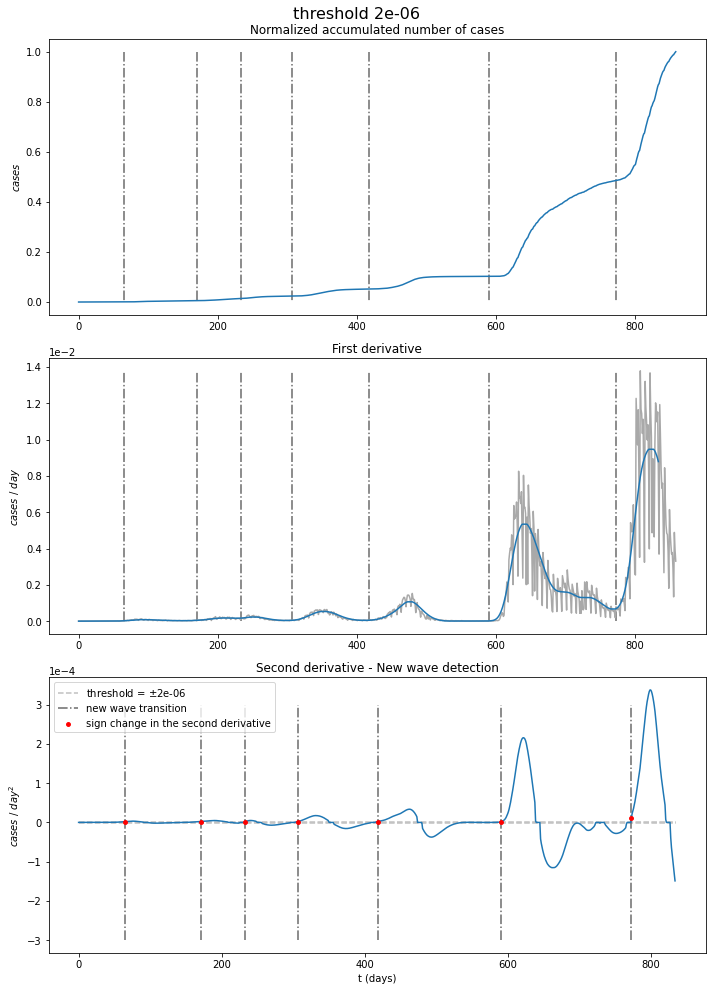

x_nw: [171, 233, 307, 418, 591]


In [6]:
# Transition Points
x_nw = get_transition_points(acc_data, visual=True, threshold=2e-6, indicator = indicator)
x_nw = x_nw[1:6]

print('x_nw:', x_nw)

Sigmoid #1 - A0:18.100193323881857 | tp0:97.02609353992409 | delta0:12.905648758250319 | nu0:1.0 
(optimal) Sigmoid #1 - A0:18.100193323881857 | tp0:97.02609353992409 | delta0:12.905648758250319 | nu0:1.0 
Sigmoid #2 - A0:36.902367680724545 | tp0:205.52619260101486 | delta0:12.473181776263845 | nu0:1.0 
(optimal) Sigmoid #2 - A0:36.902367680724545 | tp0:205.52619260101486 | delta0:12.473181776263845 | nu0:1.0 
Sigmoid #3 - A0:33.490509592629145 | tp0:252.84174635177345 | delta0:8.17235726462127 | nu0:1.0 
(optimal) Sigmoid #3 - A0:33.490509592629145 | tp0:252.84174635177345 | delta0:8.17235726462127 | nu0:1.0 
Sigmoid #4 - A0:110.15757657421683 | tp0:350.37055677028667 | delta0:11.456177953233244 | nu0:1.0 
(optimal) Sigmoid #4 - A0:110.15757657421683 | tp0:350.37055677028667 | delta0:11.456177953233244 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #5 - A0:199.62568435949305 | tp0:471.7125207060246 | delta0:10.583205084195649 | nu0:1.0 


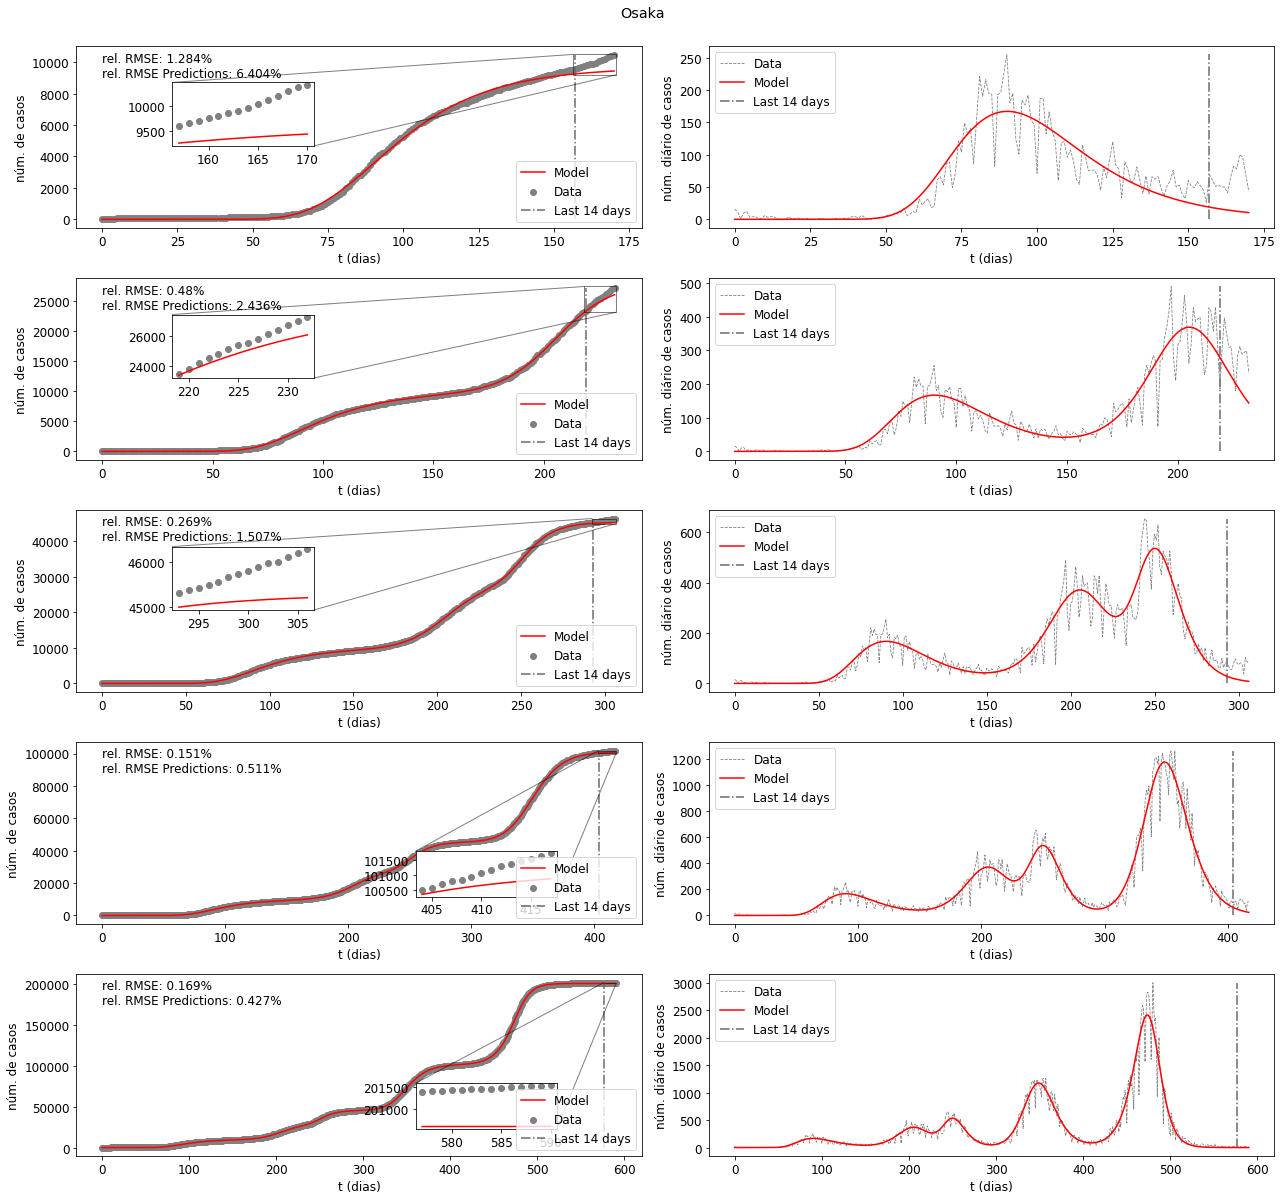

In [7]:
sig_params = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 2,
                               scaling_factor = scaling_factor
                            )

In [8]:
# Save model parameters
#np.save(f'Pickle/{city_name}_{indicator}_parameters.npy', sig_params)